In [1]:
import pandas as pd
import re 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [5]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text


data['Review'] = data['Review'].apply(clean_text)

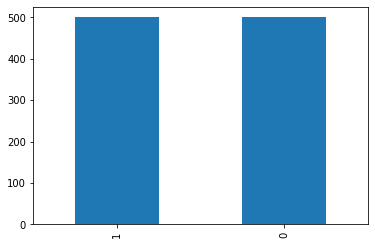

In [11]:
#barplot for both positive and negative reviews
data.sentiment.value_counts().plot(kind='bar')
plt.show()

In [35]:
#count vectorizer speparately for positive and negative reviews
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(max_features=2000, ngram_range=(1,3))
X = cv.fit_transform(data['Review'])
y = data.Liked.values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


from sklearn.naive_bayes import MultinomialNB
MN=MultinomialNB()
MN.fit(X_train,y_train)
y_pred=MN.predict(X_test)









In [36]:
y_pred=MN.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0], dtype=int64)

In [37]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.815

In [57]:
#create a pipeline for the model with vectorizer and classifier
#TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(max_features=2000, ngram_range=(1,3))),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

In [58]:
#train test split
x=data['Review']
y=data['Liked']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [59]:
#fit the pipeline
pipeline.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer(max_features=2000, ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [60]:
predi=pipeline.predict(x_test)
predi

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [61]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predi)


0.815

In [63]:
#pickel the model
import pickle
pickle.dump(pipeline, open('model.pkl','wb'))


In [71]:
#create a function to predict the sentiment of a review uisng pickle model
def predict_sentiment(review):
    pipeline = pickle.load(open('model.pkl','rb'))
    review = pipeline.fit_transform([review])
    return pipeline.predict(review)

    

In [73]:
# print(predict_sentiment('This is a very good restaurant'))